# CHAPTER 14 - Probabilistic Reasoning over Time 

### George Tzanetakis, University of Victoria 


## WORKPLAN 

The section number is based on the 4th edition of the AIMA textbook and is the suggested
reading for this week. Each list entry provides just the additional sections. For example the Expected reading include the sections listed under Basic as well as the sections listed under Expected. Some additional readings are suggested for Advanced. 

1. Basic: Sections **14.1**, **14.3, and **Summary**
2. Expected: Same as Basic plus 14.2  
3. Advanced: All the chapter including bibligraphical and historical notes 




## Time and Uncertainty 


Agents operate over time. They need to maintain a **belief state** (a set of variables (or random variables) indexed by time) that represents which states of the world are currently possible. From the **belief** state and a transition model, the agent can predict how the world might evolve in the next time step. From the percepts observed and a **sensor** model, the agent can update the **belief state**. 

* CSP: belief states are variables with domains 
* Logic: logical formulaes which belief states are possible 
* Probablities: probabilities which belief states are likely 



* **Transition model:** describe the probability distribution of the variables at time $t$ given the state of the world at past time 
* **Sensor model:** the probability of each percept at time $t$, given the current state of the world 

* Dynamic Bayesian Networks 
    * Hidden Markov Models 
    * Kalman Filters 
    
    
### States and Observations 

**Discrete-time** models, the world is views as a series of **time slices** 

Each time slide contains a set of **random variables**, some observable and some not. 

*Example scenario:* you are the security guard stationed at a secret underground installation. 
You want to know whether it is raining today, but your only access to the outside world 
occurs each morning when you see the director coming in with, or without an umbrella. 

For each day $t$, the evidence set $E_t$ contains a single evidence variable $Umbrella_{t}$ or $U_t$. 
The state set $S_t$ contains a single state variable $Rain_{t}$ or $R_t$. 

<img src="images/rain_umbrella_hmm.png" width="75%"/>



### Transition and Sensor Models 


**TRANSITION MODEL** 
* General form: $P(X_t | X_{0:t-1})$

**Markov Assumption**: Andrei Markov (1856-1922) the current state only depends on a fixed number of previous states 

* First-order markov process: $P(X_t | X_{0:t-1}) = P(X_t | X_{t-1})$

Time homegeneous process: the conditional transition probabilities is the same for all time steps $t$. 


A Markov chain is a sequence of random variables
$X_1, X_2, X_3, . . .$ with the Markov property, namely that the probability of moving to the next state depends only on the present state and not on the previous states:
* $P(X_{n+1} = x|X_{1} = x_1,X_2 = x_2,...,X_n = x_n) = P(X_{n+1} = x|X_n = x_n)$


<img src="images/markov.png" width="30%"/>


The possible values of $X_i$ form a countable set $S$ called the state space of the chain. A **Markov Chain** can be specified by a transition matrix with the probabilities of going from a particular state to another state at every time step.



## Sensor model/observations 

There are many application areas, for example speech recognition, in which we are interesting in modeling probability distributions over sequences of observations. We will denote the observation at time $t$ by the variable $Y_t$. The variable can be a symbol from a discrete alphabet or a continuous variable and we assume that the observations are sampled at discrete equally-spaced time intervals so $t$ can be an integer-valued time index.

## Inference in Temporal Models 

* **Filtering:** we want to compute the posterior distribution over the current state, given all evidence to date. $P(X_t|e_{1:t})$. An almost identical calculation provides the likelihood of the evidence sequence $P(e_{1:T})$.
* **Prediction:** we want to computer the posterior distribution over the future state, given all evidence to date. $P(Xt+k|e_{1:t})$ for some $k > 0$.

* **Smoothing or hindsight:** computing the posterior distribution over a past state, given all evidence up to the present: $P(X_{t-k}|e_{1:t})$ for some $k < t$. It provides a better estimate of the state than what was available at the time, because it incorporates more evidence.

* **Most likely explanation:** Given a sequence of observations, we might wish to find the sequence of states that is most likely to have generated these observations. That is we wish to compute: 
$argmax_{x_{1:t}} P(x_{1:t}|e_{1:t})$. This is the typical inference task in Speech Recognition using Hidden Markov Models.

### Sidenote: Speech Recognition

In phonology and linguistics, a phoneme is a unit of sound that can distinguish one word from another in a particular language. For example the english words **book** and **took** differ in one phoneme (the b vs t sound) 
and contain the same two remaining phonemes the **oo** sound and **k** sound. There is a clear correspondence between the written alphabet symbols of a word and the corresponding phonemes but in English there is a lot of confusing variation. For example the writtern symbols **oo** correspond to a different phoneme in the word **door**. In languages like Spanish or Greek there is a stronger direct correspondance between the written symbols and phonemes making it possible to "read" a Greek text without making phoneme errors even if you 
don't know the underlying words something much harder to do in English. 

The task of speech recognition is to take as input an audio recording a human talking and convert that recording to written words. It is possible to convert written words to sequences of phonemes and vice versa using a phonetic dictionary. For example check: http://www.speech.cs.cmu.edu/cgi-bin/cmudict

There are different symbolic representations for phonemes. For example the international phonetic alphabet is an alphabetic system of phonetic notation based primarily on the Latin script that tries to cover the sounds of all languages around the world. Interesting sidenote: all babies are born with the ability to recongize and also reproduce all phonemes but as they age in a particular linguistic environment their ability gets restricted/pruned to the phonemes of the particular languages they are exposed to. 

So once we have the phonetic dictionary our task becomes to convert an audio recording of a human voice to a sequence of phonemes that can then be converted to written words using a phonetic dictionary. 

Without going into details we form different phonemes by appropriately shaping our mouths and tongue and using our vocal folds to produce pitched and unpitched phonemes/sounds (vowels and consonants). It is possible to compute features such as **Mel-Frequency Cepstral Coefficients (MFCC)** using Digital Signal Processing techniques that characterizes these configurations over short intervals of time (typically 20-40 milliseconds). 

So now, the task of automatic speech recognition becomes given a time sequence of feature vectors (computed from the audio recording) find the most likely sequence of phonemes that produced that sequence of feature vectors. 
Phonemes and especially vowels can have different durations so a particular word can be represented as a sequence of states corresponding to phonemes with repetitions. For example for the word **book** we might have the following sequence: $b,b,oo,oo,oo,oo,oo,oo,oo,oo,oo,oo,oo,k,k$ with informal state notation corresponding to the phonemes. Further complicating our task is the fact that depending on speakers and inflection there are many possible ways to render a particular phoneme. So we can also think of each phoneme as a distribution of feature vectors. 

So let's look at some possible approaches to solve this problem in order of increasing complexity but 
also improved accuracy: 

1. We can train a classifiers that given a feature vector predicts the corresponding phoneme. However this approach does not take into account that different phonemes have different probabilities (for example the phoneme correpsonding to the written symbol $z$ is less likely than the phoneme corresponding to the vowel $a$ as in the word apple), different phonemes have different typical durations (for example vowels tend to be longer than consonants), and certain transitions between phonemes for example $z$ followed by $b$ are very unlikely if not impossible whereas other ones are are much more common for example $r$ followed by $a$ as in the word apple). 
2. We can model the probabilities of diffeerent phonemes and their transitions as a first order Markove chain where the state is the phoneme and then the observation output of each state can be modelled as a continuous probability distribution over the **MFCCs** feature space. That way duration and transition information is taken into account when performing automatic speech recognition. 


Automatic Speech Recognition Systems based on Hidden Markov Models (HMMs) dominated the field for about 20 years until they were superseded by deep learning models in the last decade or so. They are still widely used especially in situations with restricted computational resources where deep learning systems are not practical. 

## Hidden Markov Models 


Properties:

* The observation at time $t$ is generated by some random process whose state $S_t$ is hidden from the observer.
* The hidden states form a **Markov Chain** i.e given the value of $S_{t−1}$, the current state $S_t$ is independent of all states prior to $t − 1$. The outputs also satisfy a Markov property which is that given state $S_t$, the observation $Y_t$ is independent of all previous states and observations.
* The hidden state variable $S_t$ is discrete


We can write the joint distribution of a sequence of states and observations by using the Markov assumptions to factorize:


* $ P(S_{1:T},Y_{1:T}) = P(S_1)P(Y_1|S_1) \prod_{t=2}^{T}P(St|S_{t−1})P(Yt|St)$


where the notation $X_{1:T}$ indicates thesequence $X_1,X_2,...,X_T$.

We can view the Hiddean Markov Model graphically as a Bayesian network by unrolling over time - think of the HMM as a template for generating a Bayesian Network and the corresponding CPTs over time. In fact, it is possible 
to perform the temporal inference tasks using exact or approximate inference of the corresponding Bayesian network but for **HMMs** there are significantly more efficient algorithms. 

<img src="images/hmm2bayesnet.png" width="50%"/>


### Specifying an HMM


So all we need to do to specify an HMM are the following components:
    
* A probability distribution over the intial state $P(S_1)$
* The $K$ by $K$ state transition matrix $P(St|St−1)$, where $K$ is the number of states
* The $K$ by $L$ emission matrix $P(Yt|St)$ if $Y_t$ is discrete and has $L$ values, or the parameters $θ_t$ of some form of continuous probability density function if $Yt$ is continuous.

### Learning the transition and sensor models

In addition to these tasks, we need methods for learning the transition and sensor models from observations. The basic idea is that inference provides an estimate of what transitions actually occurred and what states generated the observations. These estimates can then be used to update the models and the process can be repeated. This is an instance of the expectation-maximization (EM) algorithm. We will talk about learning probabilistic models in Chapter 20 Learning Probabilistic Models. 

### Sketch of filtering and prediction (Forward)

We perform recursive estimation. First the current state distribution is projected forward from $t$ to $t + 1$. Then it is updated using the new evidence $e_{t+1}$. We will not cover the details but it can be done by recursive application of Bayes rule and the Markov property of evidence and the sum/product rules.
We can think of the filtered estimate $P(X_t|e_{1:t})$ as a “message” that is propagated forward along the sequence, modified by each transition, and updated by each new observation.

### Sketch of smoothing (Backward)

There are two parts to computing the distribution over past states given evidence up to the present. The first is the evidence up to $k$, and then the evidence from $k + 1$ to $t$. The forward message can be computed as by filtering from $1$ to $k$. Using conditional independence and the sum and product rules we can form a backward message that runs backwards from $t$. It is possible to combine both steps in one pass to smooth the entire sequence. This is, not surprisingly, called the **Foward-Backward** algorithm.

### Finding the most likely sequence

View each sequence of states as a path through a graph whose nodes are the possible states at each time step. The task is to find the most likely path through this graph, where the likelihood of any path is the product of the transition probabilities along the path and the probabilities of the given observations at each state. Because of the **Markov** property there is a recursive relationshtip between the most likely paths to each state $x_{t+1}$ and most likely paths to each state $x_t$. By running forward along the sequence, and computing m messages at each time step we will have the probaiblity for the most likely sequence reaching each of the final states. Then we simply select the most likely one. This is called the **Vitterbi** algorithm.

### Markov Chains and Hidden Markov Models Example 

We start with random variables and a simple independent, identically distributed model for weather. Then we look into how to form a Markov Chain to transition between states and finally we sample a Hidden Markov Model to show how the samples are generated based on the Markov Chain of the hidden states. The results are visualized as strips of colored rectangles. Experiments with the transition probabilities and the emission probabilities can lead to better understanding of how Hidden Markov Models work in terms of generating data.

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
# from hmmlearn import hmm



class Random_Variable: 
    
    def __init__(self, name, values, probability_distribution): 
        self.name = name 
        self.values = values 
        self.probability_distribution = probability_distribution 
        if all(type(item) is np.int64 for item in values): 
            self.type = 'numeric'
            self.rv = stats.rv_discrete(name = name, values = (values, probability_distribution))
        elif all(type(item) is str for item in values): 
            self.type = 'symbolic'
            self.rv = stats.rv_discrete(name = name, values = (np.arange(len(values)), probability_distribution))
            self.symbolic_values = values 
        else: 
            self.type = 'undefined'
            
    def sample(self,size): 
        if (self.type =='numeric'): 
            return self.rv.rvs(size=size)
        elif (self.type == 'symbolic'): 
            numeric_samples = self.rv.rvs(size=size)
            mapped_samples = [self.values[x] for x in numeric_samples]
            return mapped_samples 
        
    def probs(self): 
        return self.probability_distribution
    
    def vals(self): 
        print(self.type)
        return self.values 
            
        

### Generating random weather samples with a IID model with no time dependencies


Let's first create some random samples of a symbolic random variable corresponding to the weather with two values Sunny (S) and cloudy (C) and generate random weather for 365 days. The assumption in this model is that the weather of each day is indepedent of the previous days and drawn from the same probability distribution.

In [3]:
values = ['S', 'C']
probabilities = [0.9, 0.1]
weather = Random_Variable('weather', values, probabilities)
samples = weather.sample(365)
print(",".join(samples))

S,S,S,S,S,S,S,C,C,S,S,C,S,S,S,C,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,C,C,S,C,S,S,S,S,S,C,S,S,S,S,C,S,S,S,S,S,S,S,S,S,S,S,C,S,S,S,S,S,S,S,S,S,S,C,S,C,S,S,S,S,S,S,S,S,S,S,S,C,S,S,C,S,S,S,S,S,S,S,S,S,S,S,S,S,C,S,S,S,S,C,S,S,S,S,S,S,C,S,S,S,S,S,S,S,S,S,S,S,S,S,S,C,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,C,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,C,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,C,S,S,S,S,C,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,C,S,C,S,S,S,S,S,S,S,S,C,S,S,S,S,S,S,S,C,S,S,C,S,C,C,S,S,S,S,S,S,S,C,S,S,S,S,S,S,S,S,C,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,C,S,S,S,C,S,S,S,S,S,S,C,S,S,S,S,S,S,S,S,C,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S


Now let lets visualize these samples using yellow for sunny and grey for cloudy 

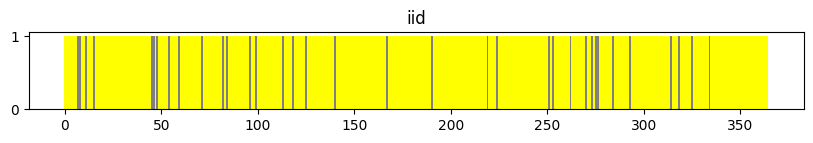

In [4]:
state2color = {} 
state2color['S'] = 'yellow'
state2color['C'] = 'grey'

def plot_weather_samples(samples, state2color, title): 
    colors = [state2color[x] for x in samples]
    x = np.arange(0, len(colors))
    y = np.ones(len(colors))
    plt.figure(figsize=(10,1))
    plt.bar(x, y, color=colors, width=1)
    plt.title(title)
    
plot_weather_samples(samples, state2color, 'iid')


### Markov Chain

Now instead of independently sampling the weather random variable lets form a markov chain. The Markov chain will start at a particular state and then will either stay in the same state or transition to a different state based on a transition probability matrix. To accomplish that we basically create a random variable for each row of the transition matrix that basically corresponds to the probabilities of the transitions emanating fromt the state corresponding to that row. Then we can use the markov chain to generate sequences of samples and contrast these sequence with the iid weather model. By adjusting the transition probabilities you can in a probabilistic way control the different lengths of "stretches" of the same state.


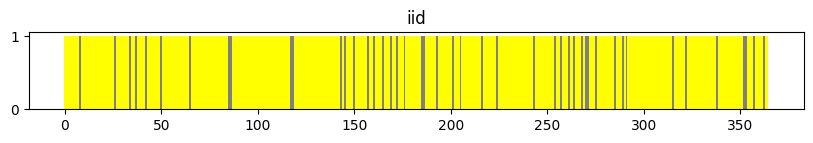

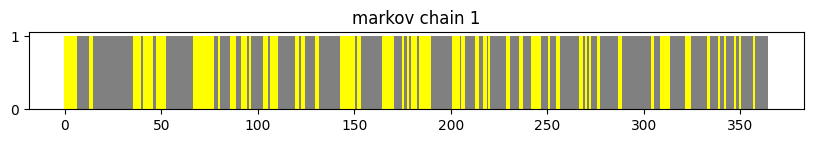

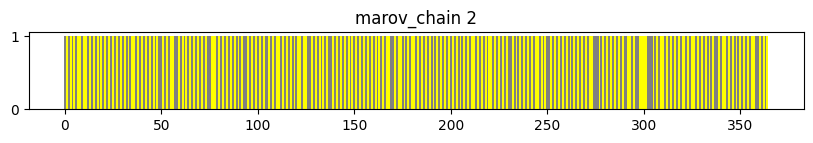

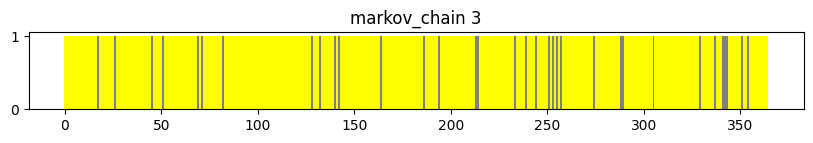

In [8]:
def markov_chain(transmat, state, state_names, samples): 
    (rows, cols) = transmat.shape 
    rvs = [] 
    values = list(np.arange(0,rows))
    
    # create random variables for each row of transition matrix 
    for r in range(rows): 
        rv = Random_Variable("row" + str(r), values, transmat[r])
        rvs.append(rv)
    
    # start from initial state and then sample the appropriate 
    # random variable based on the state following the transitions 
    states = [] 
    for n in range(samples): 
        state = rvs[state].sample(1)[0]    
        states.append(state_names[state])
    return states


# transition matrices for the Markov Chain 
transmat1 = np.array([[0.7, 0.3], 
                    [0.2, 0.8]])

transmat2 = np.array([[0.1, 0.9], 
                    [0.9, 0.1]])

transmat3 = np.array([[0.9, 0.1], 
                     [0.9, 0.1]])

state2color = {} 
state2color['S'] = 'yellow'
state2color['C'] = 'grey'

# plot the iid model too
samples = weather.sample(365)
plot_weather_samples(samples, state2color, 'iid')

samples1 = markov_chain(transmat1,0,['S','C'], 365)
plot_weather_samples(samples1, state2color, 'markov chain 1')

samples2 = markov_chain(transmat2,0,['S','C'],365)
plot_weather_samples(samples2, state2color, 'marov_chain 2')

samples3 = markov_chain(transmat3,0,['S','C'], 365)
plot_weather_samples(samples3, state2color, 'markov_chain 3')



### Generating samples using a Hidden Markov Model 

Lets now look at how a Hidden Markov Model would work by having a Markov Chain to generate 
a sequence of states and for each state having a different emission probability. When sunny we will output red or yellow with higher probabilities and when cloudy black or blue. First we will write the code directly and then we will use the hmmlearn package. 


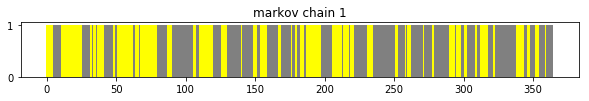

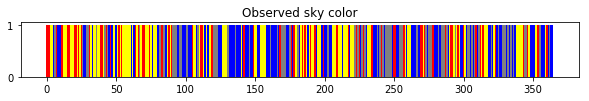

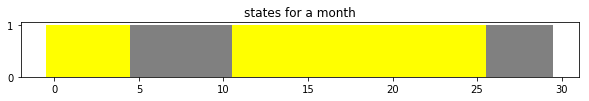

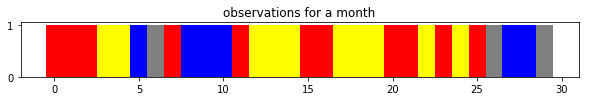

In [12]:
state2color = {} 
state2color['S'] = 'yellow'
state2color['C'] = 'grey'

# generate random samples for a year 
samples = weather.sample(365)
states = markov_chain(transmat1,0,['S','C'], 365)
plot_weather_samples(states, state2color, "markov chain 1")

# create two random variables one of the sunny state and one for the cloudy 
sunny_colors = Random_Variable('sunny_colors', ['y', 'r', 'b', 'g'], 
                              [0.6, 0.3, 0.1, 0.0])
cloudy_colors = Random_Variable('cloudy_colors', ['y', 'r', 'b', 'g'], 
                               [0.0, 0.1, 0.4, 0.5])

def emit_obs(state, sunny_colors, cloudy_colors): 
    if (state == 'S'): 
        obs = sunny_colors.sample(1)[0]
    else: 
        obs = cloudy_colors.sample(1)[0]
    return obs 

# iterate over the sequence of states and emit color based on the emission probabilities 
obs = [emit_obs(s, sunny_colors, cloudy_colors) for s in states]

obs2color = {} 
obs2color['y'] = 'yellow'
obs2color['r'] = 'red'
obs2color['b'] = 'blue'
obs2color['g'] = 'grey'
plot_weather_samples(obs, obs2color, "Observed sky color")

# let's zoom in a month 
plot_weather_samples(states[0:30], state2color, 'states for a month')
plot_weather_samples(obs[0:30], obs2color, 'observations for a month')


### Multinomial HMM 

Lets do the same generation process using the multinomail HMM model supported by the *hmmlearn* python package. 


In [11]:
transmat = np.array([[0.7, 0.3], 
                    [0.2, 0.8]])

start_prob = np.array([1.0, 0.0])

# yellow and red have high probs for sunny 
# blue and grey have high probs for cloudy 
emission_probs = np.array([[0.6, 0.3, 0.1, 0.0], 
                           [0.0, 0.1, 0.4, 0.5]])

model = hmm.MultinomialHMM(n_components=2)
model.startprob_ = start_prob 
model.transmat_ = transmat 
model.emissionprob_ = emission_probs

# sample the model - X is the observed values 
# and Z is the "hidden" states 
X, Z = model.sample(365)



[0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0
 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1]


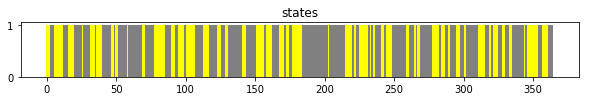

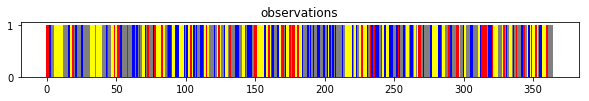

In [12]:
# we have to re-define state2color and obj2color as the hmm-learn 
# package just outputs numbers for the states 
state2color = {} 
state2color[0] = 'yellow'
state2color[1] = 'grey'
plot_weather_samples(Z, state2color, 'states')

samples = [item for sublist in X for item in sublist]
obj2color = {} 
obj2color[0] = 'yellow'
obj2color[1] = 'red'
obj2color[2] = 'blue'
obj2color[3] = 'grey'
plot_weather_samples(samples, obj2color, 'observations')

### Estimating the parameters of an HMM

Let's sample the generative HMM and get a sequence of 1000 observations. Now we can learn in an unsupervised way the paraemters of a two component multinomial HMM just using these observations. Then we can compare the learned parameters with the original parameters of the model used to generate the observations. Notice that the order of the components is different between the original and estimated models. Notice that hmmlearn does NOT directly support supervised training where you have both the labels and observations. It is possible to initialize a HMM model with some of the parameters and learn the others. For example you can initialize the transition matrix and learn the emission probabilities. That way you could implement supervised learning for a multinomial HMM. In many practical applications the hidden labels are not available and that's the hard case that is actually implemented in hmmlearn.

The following two cells take a few minutes to compute on a typical laptop.

In [19]:
# generate the samples 
X, Z = model.sample(10000)
# learn a new model 
estimated_model = hmm.MultinomialHMM(n_components=2, n_iter=10000).fit(X)


Let's compare the estimated model parameters with the original model. 


In [20]:
print("Transition matrix")
print("Estimated model:")
print(estimated_model.transmat_)
print("Original model:")
print(model.transmat_)
print("Emission probabilities")
print("Estimated model")
print(estimated_model.emissionprob_)
print("Original model")
print(model.emissionprob_)

Transition matrix
Estimated model:
[[0.80478246 0.19521754]
 [0.30878007 0.69121993]]
Original model:
[[0.7 0.3]
 [0.2 0.8]]
Emission probabilities
Estimated model
[[0.00172121 0.09897902 0.41595746 0.48334232]
 [0.62186512 0.29544231 0.08054572 0.00214684]]
Original model
[[0.6 0.3 0.1 0. ]
 [0.  0.1 0.4 0.5]]


### Predicting a sequence of states given a sequence of observations

We can also use the trained HMM model to predict a sequence of hidden states given a sequence of observations. This is the task of maximum likelihood sequence estimation. For example in Speech Recognition it would correspond to estimating a sequence of phonemes (hidden states) from a sequence of observations (acoustic vectors). 

This cell also takes a few minutes to compute. Note that whether the predicted or flipped predicted states correspond to the original depends on which state is selected as state0 and state1. So sometimes when you run the notebook the predicted states will be the right color some times the flipped states will be the right ones. 

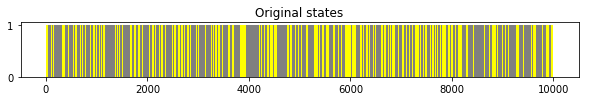

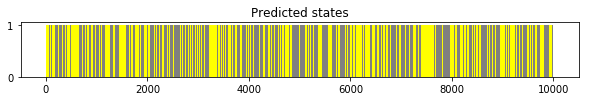

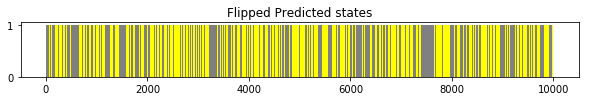

In [20]:
Z2 = estimated_model.predict(X)
state2color = {} 
state2color[0] = 'yellow'
state2color[1] = 'grey'
plot_weather_samples(Z, state2color, 'Original states')
plot_weather_samples(Z2, state2color, 'Predicted states')

# note the reversal of colors for the states as the order of components is not the same. 
# we can easily fix this by change the state2color 
state2color = {} 
state2color[1] = 'yellow'
state2color[0] = 'grey'
plot_weather_samples(Z2, state2color, 'Flipped Predicted states')




The estimated model can be sampled just like the original model 

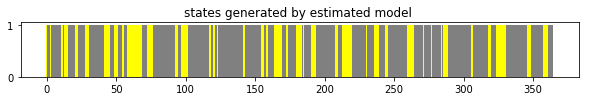

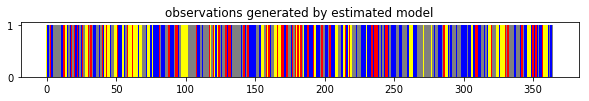

In [19]:
X, Z = estimated_model.sample(365)

state2color = {} 
state2color[0] = 'yellow'
state2color[1] = 'grey'
plot_weather_samples(Z, state2color, 'states generated by estimated model ')

samples = [item for sublist in X for item in sublist]
obs2color = {} 
obs2color[0] = 'yellow'
obs2color[1] = 'red'
obs2color[2] = 'blue'
obs2color[3] = 'grey'
plot_weather_samples(samples, obs2color, 'observations generated by estimated model')



### An example of filtering 

<img src="images/rain_umbrella_hmm.png" width="75%"/>


* Day 0: no observations $P(R_0) = <0.5, 0.5>$
* Day 1: let's say umbrella appears, $U_{1} = true$. 
    * The prediction step from $t=0$ to $t=1$ is 
    $P(R_1) = \sum_{r_0} P(R_1 | r_0) P(r_0) = \langle 0.7, 0.3 \rangle \times 0.5 + \langle 0.3, 0.7 \rangle \times 0.5 = \langle 0.5, 0.5\rangle $ 
    * The update step simply multiplies the probability of the evidence for $t=1$ and normalizes: 
    $P(R_1|u1) = \alpha P(u_{1} | R_{1}) P(R_1) = \alpha \langle 0.9, 0.2 \rangle \times \langle 0.5, 0.5 \rangle = \alpha \langle 0.45, 0.1 \rangle \approx \langle 0.818, 0.182 \rangle $
* Day 2: let's say umbrella appears, $U_{2} = true$. 
    *  Prediction step from $t=1$ to $t=2$ is $P(R_2 | u1) = \alpha P(u_1 | R_2) P(u_1) = \langle 0.7, 0.3 \rangle \times 0.818 + \langle 0.3 0.7 \rangle \times 0.182 \approx \langle 0.627, 0.373 \rangle $
    * Updating with evidence for t=2 gives: $P(R_2 | u_1, u_2) = \alpha P(u_2/R_2)P(R2|u_1)= \alpha \langle 0.9, 0.2 \rangle \times \langle 0.627, 0.373 \rangle = \alpha \langle 0.565, 0.0075 \rangle \approx \langle 0.883, 0.117 \rangle $
    
Intuitively, the probability of rain increases from day 1 to day 2 because the rain persists. 


Unrolling a Hidden Markov Model to a Bayesian Network

<img src="images/hmm_unrolling.png" width="75%"/>
